## Linear Regression with Python

Here I train and test a model to predict ice cream sales, based on temperature data.

<a href="https://www.kaggle.com/vinicius150987/ice-cream-revenue">Here is the dataset source</a>

### Variables: 
<b> Temperature (°C) </b>
<br />
<b> Revenue (dollars) </b>

#### Import Libraries

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Get the Data

In [48]:
df = pd.read_csv("IceCreamData.csv")
df.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


#### Explore the Data

In [49]:
# Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [50]:
# Check if there are missing values
df.isnull().sum()

Temperature    0
Revenue        0
dtype: int64

In [51]:
# Basic statitical metrics
df.describe (include = 'all') 

# how much it was sold in the coldest day?
# how much it was sold in the hottest day?
# does the dataset covers a reasonable range of temperature?

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


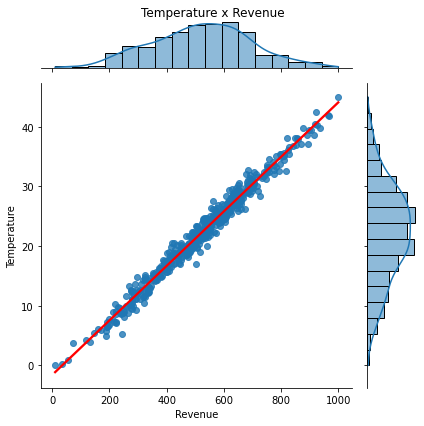

In [52]:
# check data distribution and correlations 
p = sns.jointplot(x = df['Revenue'], y = df['Temperature'], kind='reg',line_kws={"color": "red"})
p.fig.suptitle("Temperature x Revenue")
p.fig.tight_layout()
p.fig.subplots_adjust(top=0.95)

#### Define Train Test Split

In [53]:
from sklearn.model_selection import train_test_split

X = df[['Temperature']]
y = df[['Revenue']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=42)

#### Regression model: train and test

In [54]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

lm.fit(X_train,y_train)

predictions = lm.predict(X_test)

#### Evaluate the model

Text(0.5, 1.0, 'Revenue')

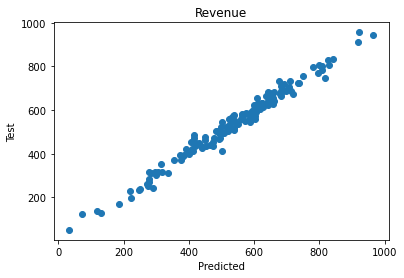

In [55]:
# predicted x actual value from test dataset
plt.scatter(y_test,predictions)
plt.xlabel("Predicted")
plt.ylabel("Test")
plt.title("Revenue")

C:\Users\danim\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\danim\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

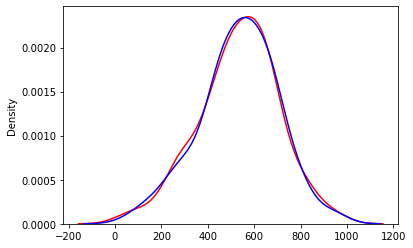

In [56]:
# is the residual distribution normal?
sns.distplot(y_test,color="r",hist=False,label="Actual Value")
sns.distplot(predictions,color="b",hist=False,label="Model")

In [57]:
# Error metrics
from sklearn import metrics
from sklearn.metrics import r2_score

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print("R^2:",r2_score(y_test, predictions))

MAE: 18.893250828365733
MSE: 592.8023375060735
RMSE: 24.347532472636185
R^2: 0.9798591190745727


# Interpretation of the coefficients

In [58]:
coefficients = pd.DataFrame(lm.coef_,X.columns)
coefficients.columns = ['Coeffecient']
coefficients

,Coeffecient
Temperature,21.419336


# Real-time prediction
Take today's temperature and predict sales for today


In [59]:
# Take temperature at current location
from bs4 import BeautifulSoup as bs
import requests
page = requests.get("https://www.google.com/search?q=weather")
soup = bs(page.content,"html.parser")

print("Weather information:")
des = soup.find("div",attrs={"class":"BNeawe tAd8D AP7Wnd"})
print(des.text)
loc = soup.find("span",attrs={"class":"BNeawe tAd8D AP7Wnd"})
print(f"Location: {loc.text}")
temp = soup.find("div",attrs={"class":"BNeawe iBp4i AP7Wnd"})
print(f"Temperature: {temp.text}")

Weather information:
sábado 14:30
Nublado
Location: Bairro Novo, Curitiba - PR, 81935
Temperature: 19°C


In [60]:
# rearranging the dataframe
temperatureToday = np.array(float(temp.text[0:2])).reshape(-1, 1)

In [61]:
# Predict revenue for today
revenueToday = lm.predict(temperatureToday)

print(f"The revenue expected today is: {revenueToday}") 

The revenue expected today is: [[452.65365776]]


In [62]:
# See the real-time prediction your your telegram

import telebot

token = token  # insert your API key

# create the bot
bot = telebot.TeleBot(token)

@bot.message_handler(commands=["Yes"])
def option1(messageUser):
    revenue = str(float(revenueToday))    
    temperature = str(float(temperatureToday))
    bot.send_message(messageUser.chat.id, "Temperature today is "+ temperature + "°C."+"The expected revenue is R$ " + revenue)
  
@bot.message_handler(commands=["No"])
def option2(messageUser):
    bot.send_message(messageUser.chat.id,"Ok, bye for now " + "\U0001F600") 
def verify(messageUser):
    return True      

@bot.message_handler(func=verify)

def responder(messageUser):
    texto = """
    Would you like to predict ice cream sales for today? (click on option):
    /Yes
    /No"""
    bot.send_message(messageUser.chat.id,texto) 

bot.polling()

NameError: name 'token' is not defined